![logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)

> **Copyright (c) 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

## Introduction
In this tutorial, we will learn to use descriptive statistics to analyse our datesets and perform various data exploration techniques on our datasets based on variable type.

#### Importing necessary libraries

In [1]:
# Data wrangling and analysis
import pandas as pd
import numpy as np
from scipy.stats import trim_mean

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data and Some Basic Operations

In [2]:
# loading structured data into dataframe
df = pd.read_csv("../data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The data is about the marks secured by the high school students (with a variety of personal, social, and economic factors) from the United States.

`data.head()` shows the first few rows of data (5 rows by default). It enables us to quickly test if our dataset has the correct data in it.

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


`data.describe()` shows a **basic descriptive analysis** (for numerical variables). It can be used to spot some obvious outliers. For example, if the `max` for `math score` is 1000, we can know that it is an outlier due to data error and need to be handled such as removing the entire record.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


`data.info()` can be used to:
1. Check the **count number** of the dataset (at `RangeIndex`)
2. Check if there are **missing values** or not (by checking if the `Non-Null Count` for each variable is fewer than the number of records or not)
3. Check the **data type** of all the variables of the dataset 
    - `object` are usually **categorical** (sometimes can be other types such as **datetime**)
    - `int` and `float` are usually **numerical** (sometimes can be other types such as **boolean** (0/1))

In [6]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

`data.nunique()` can be used to check the count number of distinct elements for each variables. If the `nunique` of a `numerical` variable is very low (such as fewer than 10), you should check if it is label encoded categorical variable or not.


Since our data is clean (no obvious outliers, no missing values etc.), so we can proceed with EDA without going through data cleaning

## Descriptive Analysis

A quick general descriptive analysis can be done using `data.describe()` (as shown in previous section). However, for most of the cases, it is not detailed enough. The following section demostrates how to perform a more detailed and specific descriptive analysis.

### Measures of Central Tendency

**Mean**, **trimmed mean** and **median** are widely used measures of central cendency. The following codes are those measures for the variable `math score`. For **trimmed mean**, we need to specify the **percentage** of the data to be ignored at both ends of sorted data.

In [7]:
# mean
df["math score"].mean()

66.089

In [8]:
# trimmed mean
trim_mean(df["math score"], 0.05)

66.34

In [9]:
# median
df["math score"].median()

66.0

### Measures of Dispersion

In [10]:
# MAD implementation fromm scratch
np.mean(abs(df["math score"] - df["math score"].mean()))

12.020246

In [11]:
# pandas built-in MAD function
df["math score"].mad()

12.020246

We can implement **mean absolute deviation (MAD)** from scratch but obviously it is more convenient to use the pandas built-in function.

In [12]:
# standard deviation
df["math score"].std()

15.163080096009468

In [13]:
# variance
df["math score"].var()

229.91899799799847

In [14]:
df["math score"].std() ** 2 == df["math score"].var()

False

As expected, the **variance** of the `math score` is equal to the **square** of its **standard deviation**.

In [15]:
# skewness
df["math score"].skew()

-0.27893514909431694

In [16]:
# kurtosis
df["math score"].kurtosis()

0.27496405752108455

- The **skewness** of `math score` is negative, implies that the distribution of `math score` is negatively skewed (slightly).
- The **kurtosis** of `math score` is positive, implies that the distribution of `math score` is leptokurtic (heavy-tailed). Outliers are likely to present.

## Data Exploration

### Univariate Analysis: Continuous Variables

Univariate analysis techniques for continuous variables includes descriptive analysis, which most of them has been coverred in previous section. Therefore in this section we will cover the rest of the non-graphical techniques and some graphical techniques. 

#### Percentile

Percentile is known as quantile in *pandas*.

In [17]:
# Return values at the requested percentiles for a numerical variable
df["math score"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    40.95
0.25    57.00
0.50    66.00
0.75    77.00
0.95    90.05
Name: math score, dtype: float64

In [18]:
# Return values at the requested percentiles
# for all numerical variables of a dataframe
df.quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,math score,reading score,writing score
0.05,40.95,44.0,42.95
0.25,57.00,59.0,57.75
0.50,66.00,70.0,69.00
0.75,77.00,79.0,79.00
0.95,90.05,92.0,92.00


#### Interquartile range (IQR)

- IQR = Q3 - Q1 (75th percentile - 25th percentile) 
- **IQR method** can be used to detect outliers, where any data points that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are outliers. 

In [19]:
IQR = df["math score"].quantile(0.75) - df["math score"].quantile(0.25)
print("For math score:")
print("IQR: ", IQR)
print("1.5 IQR: ", 1.5 * IQR)

For math score:
IQR:  20.0
1.5 IQR:  30.0


#### Boxplots

A single boxplot can be plotted using the below codes:

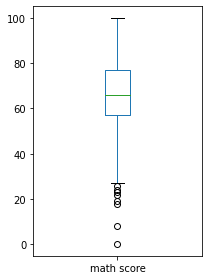

In [20]:
ax = df["math score"].plot.box(figsize=(3, 4))

plt.tight_layout()
plt.show()

By **IQR method**, the values below Q1 - 1.5IQR = 57 - 30 = 27 are considered as **outliers**, which are indicated as small circles in the boxplot.

#### Frequency Table

- In order to generate a frequency table for a continuous variable, we must divide up the variable range into equal size bins.

In [21]:
# Cut the variable range into 10 bins and calculate the count number for each bins
binnedMathScore = pd.cut(df["math score"], 10)
binnedMathScore.value_counts().sort_index()

(-0.1, 10.0]       2
(10.0, 20.0]       2
(20.0, 30.0]      12
(30.0, 40.0]      34
(40.0, 50.0]     100
(50.0, 60.0]     189
(60.0, 70.0]     270
(70.0, 80.0]     215
(80.0, 90.0]     126
(90.0, 100.0]     50
Name: math score, dtype: int64

In [22]:
# Generate a frequency table using data from above cell
df_binnedMathScore = binnedMathScore.value_counts().sort_index().reset_index()
df_binnedMathScore.columns = ["BinRange", "Count"]
print("Frequency table for math score:")
df_binnedMathScore

Frequency table for math score:


,BinRange,Count
0,"(-0.1, 10.0]",2
1,"(10.0, 20.0]",2
2,"(20.0, 30.0]",12
3,"(30.0, 40.0]",34
4,"(40.0, 50.0]",100
5,"(50.0, 60.0]",189
6,"(60.0, 70.0]",270
7,"(70.0, 80.0]",215
8,"(80.0, 90.0]",126
9,"(90.0, 100.0]",50


#### Histogram

- Histogram is a way to visualize a frequency table. 
- It can be generated using `displot` function from `seaborn` library
- The parameter `bins` is used to determine numbers of bins of the histogram.

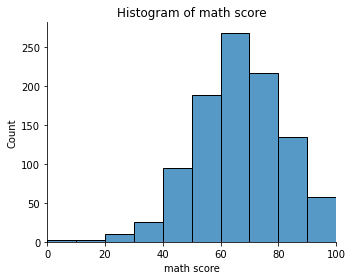

In [23]:
fig = sns.displot(df["math score"], bins=10, height=4, aspect=1.25)
fig.set(xlim=(0, 100), title="Histogram of math score")

plt.tight_layout()
plt.show()

We can notice that the distribution of the math score is slightly negatively skewed.

#### Density Plots and Estimates

- Density plot can be considered as a smoothed histogram, which is typically computed through kernel density estimation (KDE).
- For density plot and histogram to be plotted together, we can use the `histplot` function from `seaborn` with parameter `kde` = `True`.
- The parameter `bins` is used to determine numbers of bins of the histogram.
- If you need only density plot, you may tou `kdeplot` instead of `histplot`.

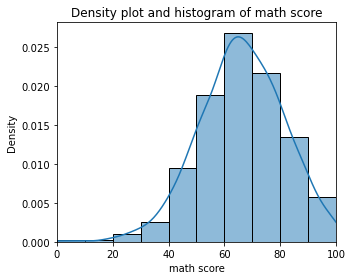

In [24]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.histplot(df["math score"], kde=True, stat="density", bins=10)
ax.set(xlim=(0, 100), title="Density plot and histogram of math score")

plt.tight_layout()
plt.show()

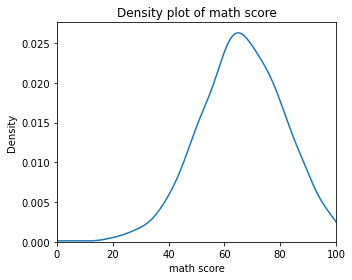

In [25]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.kdeplot(df["math score"])
ax.set(xlim=(0, 100), title="Density plot of math score")

plt.tight_layout()
plt.show()

### Univariate Analysis: Binary and Categorical Variables

For binary and categorical variables, we tend to focus on the frequency of each category for that particular variable.

#### Mode

Indicate the category which has the maximum frequency for a particular variable

In [26]:
df["race/ethnicity"].mode()

0    group C
dtype: object

#### Bar Plot

- visualize the frequency of each category of a selected variable
- can be plotted using `catplot` function from `seaborn` where the parameter `kind`=`count`

In [27]:
# Frequency of each category of race/ethnicity
df["race/ethnicity"].value_counts().sort_index()

group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

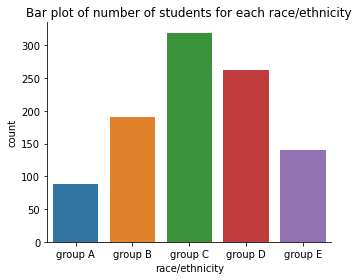

In [28]:
fig = sns.catplot(
    data=df.sort_values("race/ethnicity"),
    x="race/ethnicity",
    kind="count",
    height=4,
    aspect=1.2,
)
fig.set(title="Bar plot of number of students for each race/ethnicity")
plt.tight_layout()
plt.show()

Besides **group C** is the **mode**, we can also interpret that **group A** has the **fewest count number**.

### Multivariate  Analysis: Continuous Variables vs Continuous Variables

#### Correlation and Correlation Matrix

- **Correlation** is the measure of how **two or more continuous variables** are ***linearly* related** to each other.
- **Correlation coefficient** is the **metric** that measures the degree of correlation (usually ranges from -1 to +1).
- **Correlation matrix** is a **table** that shows the **correlation coefficients** among the variables. 

`corr` from `pandas` library is a straightforward function to generate correlation matrix. The default type of correlation coefficient is `pearson` . You may change it by specifying the parameter`method` = `spearman` or `kendall`.

In [29]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


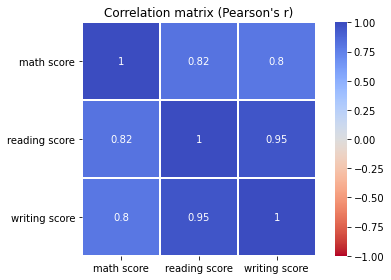

In [30]:
# Visualization of correlation matrix
ax = sns.heatmap(
    df.corr(),
    vmin=-1,
    vmax=1,
    square=True,
    linewidth=0.5,
    cmap="coolwarm_r",
    annot=True,
)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set(title="Correlation matrix (Pearson's r)")

plt.tight_layout()
plt.show()

#### Scatterplots

- Visualizes the relationships between two continuous variables.
- The x-axis represents one variable and the y-axis represents another variable
- `relplot` can be used to plot relationship between two selected variables.
- `pairplot` is a convinient function to plot pairwise relationships for all continuous variables

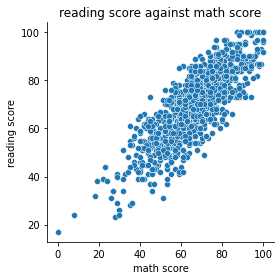

In [31]:
fig = sns.relplot(data=df, x="math score", y="reading score", height=4)
fig.set(title="reading score against math score")

plt.tight_layout()
plt.show()

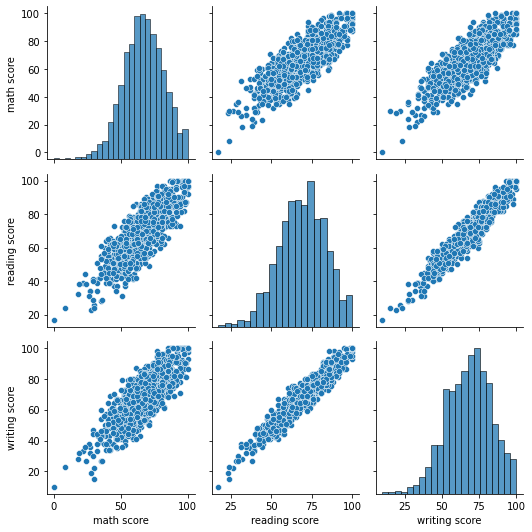

In [32]:
fig = sns.pairplot(df)

plt.tight_layout()
plt.show()

We can observe that `math score`, `reading score` and `writing score` has strong posiitive correlation among each other.

### Multivariate  Analysis: Categorical Variables vs Continuous  Variables

#### Contingency table

- Also known as crosstab in `pandas`
- By default computes a **frequency table** of the variables, can be changed to percentage by changing the parameter `normalize` to 
    - `True`(normalize over all values), 
    - `index`(normalize over each row) or 
    - `columns` (normalize over each column) 
- Can change the parameter `margins` to `True` to add subtotals for each row and column.

In [33]:
# 2-way table
pd.crosstab(
    df["gender"],
    df["race/ethnicity"],
    margins=True,
    margins_name="Total",
    normalize=True,
)

race/ethnicity,group A,group B,group C,group D,group E,Total
gender,,,,,,
female,0.036,0.104,0.180,0.129,0.069,0.518
male,0.053,0.086,0.139,0.133,0.071,0.482
Total,0.089,0.190,0.319,0.262,0.140,1.000


In [34]:
# 3-way table
pd.crosstab(df["parental level of education"], [df["gender"], df["race/ethnicity"]])

gender                       female                                    male  \
race/ethnicity              group A group B group C group D group E group A   
parental level of education                                                   
associate's degree                6      23      45      24      18       8   
bachelor's degree                 3      11      26      13      10       9   
high school                       7      28      30      17      12      11   
master's degree                   2       5       7      15       7       1   
some college                      8      15      44      35      16      10   
some high school                 10      22      28      25       6      14   

gender                                                       
race/ethnicity              group B group C group D group E  
parental level of education                                  
associate's degree               18      33      26      21  
bachelor's degree                 9      14      15       8  
high school                      20      34      27      10  
master's degree                   1      12       8       1  
some college                     22      25      32      19  
some high school                 16      21      25      12

#### Side By Side Barplot

- Side by side barplot can be used to visualize the contingency table
- Can be plotted using `catplot` function from `seaborn` where the parameter `kind`=`count`, and `hue` is specified as another categorical variable

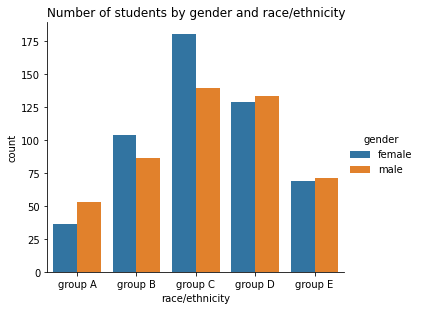

In [35]:
# Side by side barplot of the 2-way contingency table above
fig = sns.catplot(
    data=df.sort_values("race/ethnicity"),
    x="race/ethnicity",
    hue="gender",
    kind="count",
    height=4,
    aspect=1.2,
)
fig.set(title="Number of students by gender and race/ethnicity")
plt.show()

We can notice that the students from this high school are mostly comprised of group C female and lea 

### Multivariate  Analysis: Categorical vs Continuous Variables

#### Side by Side Boxplot

- A straightforward way to compare the distributions of a continuous variable grouped by a categorical variable.
- Can be plotted using `catplot` function from `seaborn` where the parameter `kind`=`box`

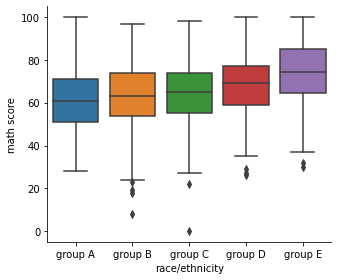

In [36]:
fig = sns.catplot(
    data=df.sort_values("race/ethnicity"),
    x="race/ethnicity",
    y="math score",
    kind="box",
    height=4,
    aspect=1.2,
)
plt.tight_layout()
plt.show()

We can interpret that group E obtained the highest math score than other group in a general sense (by comparing the quartile/distribution)

#### Violin plot

- A combination of the boxplot with a density estimation plot
- Can be plotted using `catplot` function from `seaborn` where the parameter `kind`=`violin`
- The parameter `inner` is set as `quartile` to show the quartile (Q1, median, Q3) as horizontal dash lines

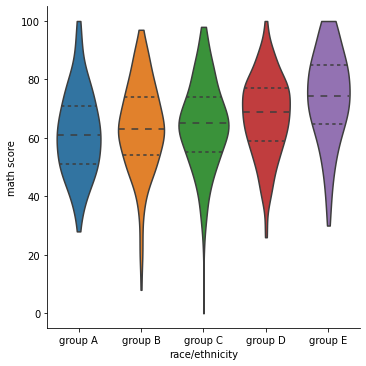

In [37]:
ax = sns.catplot(
    x="race/ethnicity",
    y="math score",
    kind="violin",
    cut=0,
    inner="quartile",
    data=df.sort_values("race/ethnicity"),
)

The plot shows a concentration in the distribution near 100 for group E.

### Multivariate  Analysis: Multiple Categorical vs Continuous Variables

#### Facet Grid

- Helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.
- Can be drawn with up to three dimensions − row, col, and hue (typically categorical variables).
- For `seaborn` library, each of `relplot()`, `displot()`, `catplot()`, and `lmplot()` use Facet Grid internally.

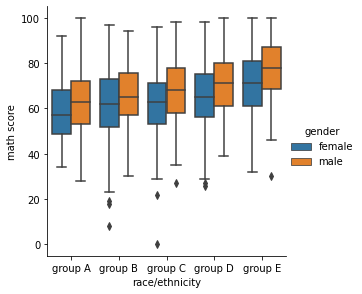

In [38]:
# Example 1
fig = sns.catplot(
    x="race/ethnicity",
    y="math score",
    hue="gender",
    kind="box",
    data=df.sort_values("race/ethnicity"),
    height=4,
)
plt.show()

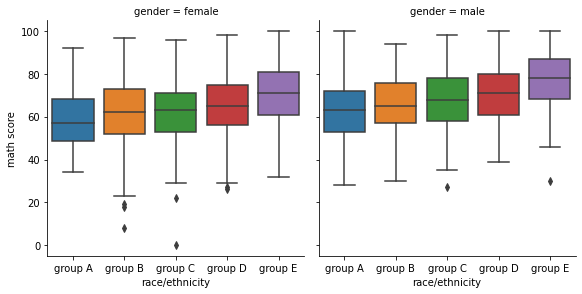

In [39]:
# Example 2
fig = sns.catplot(
    x="race/ethnicity",
    y="math score",
    col="gender",
    kind="box",
    data=df.sort_values("race/ethnicity"),
    height=4,
)
plt.show()

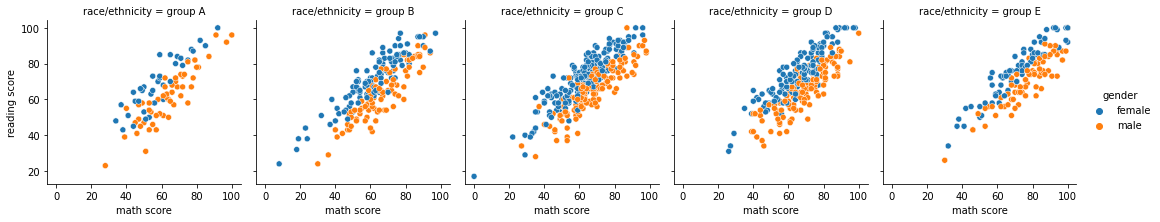

In [40]:
# Example 3
fig = sns.relplot(
    data=df.sort_values("race/ethnicity"),
    x="math score",
    y="reading score",
    height=3,
    col="race/ethnicity",
    hue="gender",
)

plt.show()

- We can also use `FacetGrid` function to form dimensions of the grid and then use `map` or `map_dataframe` to visualize data on this grid

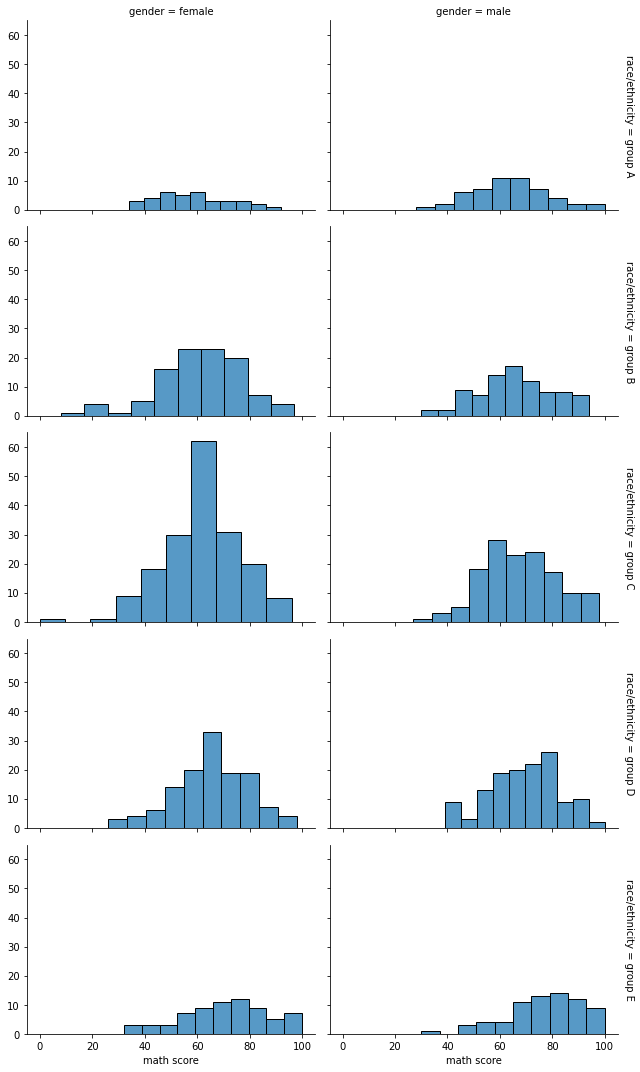

In [41]:
# Example 4
g = sns.FacetGrid(
    df.sort_values("race/ethnicity"),
    col="gender",
    row="race/ethnicity",
    height=3,
    aspect=1.5,
    margin_titles=True,
)
g.map(sns.histplot, "math score", bins=10)

plt.tight_layout()
plt.show()

#### Reference
1. https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb
2. https://github.com/nitinkaushik01/Data_Science_Bootcamp/blob/master/Uni-Variate_and_Bi-Variate_Analysis_Various_Techniques.ipynb
3. https://www.kaggle.com/spscientist/students-performance-in-exams (data source)